## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
# import data
df = pd.read_csv('ab_data.csv')

# show top rows
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
# we use shape function to see number of rows [first element]
row_num = df.shape[0]
print("Number of rows in the dataset are: {}".format(row_num))

Number of rows in the dataset are: 294478


In [4]:
# Another way to find number of rows
# Calculate number of rows in dataset and display# Calcu 
df_length = len(df)         
print(df_length)

294478


Observation:- Number of rows in the dataset - 284478

c. The number of unique users in the dataset.

In [5]:
# Calculate number of unique users in dataset
len(df.user_id.unique())

290584

Observation:- The number of unique users are 290584

d. The proportion of users converted.

In [6]:
df.converted.sum()/df_length

0.11965919355605512

In [7]:
# we can find proportion of users converted by taking mean since values are 1 and 0
print("Converted users proportion is {}%".format((df['converted'].mean())*100))

Converted users proportion is 11.96591935560551%


Observation :- The number of users converted.

## e. The number of times the `new_page` and `treatment` don't line up.

In [8]:
# Looking for rows where treatment/control doesn't line up with old/new pages respectively
dfnot_t_n_lp = df[(df['group'] == 'treatment') & (df['landing_page'] == 'old_page')]

print("Number of times treatment group user lands incorrectly on old_page is {}".format(len(dfnot_t_n_lp)))

dfnot_c_n_lp = df[(df['group'] == 'control') & (df['landing_page'] == 'new_page')]

print("Number of times control group user incorrectly lands on new_page is {}".format(len(dfnot_c_n_lp)))


# Add lengths
mismatch= len(dfnot_t_n_lp) + len(dfnot_c_n_lp)

# Create one dataframe from it
mismatch_df = pd.concat([dfnot_t_n_lp, dfnot_c_n_lp ])

mismatch

Number of times treatment group user lands incorrectly on old_page is 1965
Number of times control group user incorrectly lands on new_page is 1928


3893

Observation:- Times new_page and treatment don't line up - 3893

f. Do any of the rows have missing values?

In [9]:
# Check for missing values?
df.isnull().values.any()

False

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [11]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

Observation :- No rows have missing values.

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [12]:
# Copy dataframe
df2 = df

# Remove incriminating rows
mismatch_index = mismatch_df.index
df2 = df2.drop(mismatch_index)

In [13]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [14]:
# Find unique users
print("Unique users:", len(df2.user_id.unique()))

# Check for not unique users
print("Non-unique users:", len(df2)-len(df2.user_id.unique()))

Unique users: 290584
Non-unique users: 1


In [15]:
# unique user ids count is
len(df2['user_id'].unique())

290584

Observation:- There are 290584 unique users.

b. There is one **user_id** repeated in **df2**.  What is it?

In [16]:
# Find duplicated user
df2[df2.duplicated('user_id')]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [17]:
# Find duplicates under user ids
df2[df2['user_id']==773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


Observation:- Duplicate user id is 773192

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [18]:
# Drop duplicated user
df2.drop(labels=1899, axis=0, inplace=True)

In [19]:
# Check the drop worked
df2[df2['user_id']==773192]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


Observation:- We dropped the duplicate user id and again conformed the changes made.

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [20]:

# Probability of user converting 
print("Probability of user converting:", df2.converted.mean())

Probability of user converting: 0.11959708724499628


Observation:- Probability of converting regardless of page is 11.95% 

b. Given that an individual was in the `control` group, what is the probability they converted?

In [21]:

# Probability of control group converting# Probab 
print("Probability of control group converting:", 
      df2[df2['group']=='control']['converted'].mean())


Probability of control group converting: 0.1203863045004612


Observation:- Given an individual received the control page, the probability of converting is 12.03%

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [22]:

# Probability of treatment group converting# Probab 
print("Probability of treatment group converting:", 
      df2[df2['group']=='treatment']['converted'].mean())

Probability of treatment group converting: 0.11880806551510564


Observation:- Given that an individual received the treatment, the probability of converting is 11.88%

d. What is the probability that an individual received the new page?

In [23]:

# Probability an individual recieved new page# Probab 
print("Probability an individual recieved new page:", 
      df2['landing_page'].value_counts()[0]/len(df2))

Probability an individual recieved new page: 0.5000619442226688


Observation:- Probability an individual recieved new page: 0.5000619442226688


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

Given that an individual was in the treatment group, the probability they converted is 0.118807 Given that an individual was in the control group, the probability they converted is 0.120386 As per our observations old page does better, but by a very tiny margin. The probability that an individual recieved a new page is approximately 0.5, this means that it is not possible for there to be a difference in conversion based on being given more opportunities to do so. For instance, if the probability of recieving a new page was higher relative to the old page then it would be observed that the rate of conversion would naturally increase.

Observation:-


* Given the probability that an individual received the new page is 0.500061, suggests that there is an equal chance that an individual received the old page at the same time.
* Also, the probability of conversion from control group and treatment group is almost similar.
* we can not firmly say that one page leads to more conversions. Actually, it is quite the opposite. ** 

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

The null hypothesis 

$H_{0}$ : $p_{old}$  >= $p_{new}$

* The null hypothesis is that the difference between the population conversion rate of users given the new page and the old page will be equal to zero (the same) or lower than zero (the old page has a higher population conversion rate).



The alternative hypothesis

$H_{1}$ :  $p_{old}$ < $p_{new}$
* The alternative hypothesis is that the difference between the population conversion rate of users given the new page and the old page will be greater than zero (the new page has a higher population conversion rate).

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [24]:
# Calculate probability of conversion for new page 
p_new = df2[df2['landing_page']=='new_page']['converted'].mean()

print("Probability of conversion for new page (p_new):", p_new)

Probability of conversion for new page (p_new): 0.11880806551510564


In [25]:
# Calculate probability of conversion for old page 
p_old = df2[df2['landing_page']=='old_page']['converted'].mean()

print("Probability of conversion for old page (p_old):", p_old)

Probability of conversion for old page (p_old): 0.1203863045004612


In [26]:
# Take the mean of these two probabilities
p_mean = np.mean([p_new, p_old])

print("Probability of conversion udner null hypothesis (p_mean):", p_mean)

Probability of conversion udner null hypothesis (p_mean): 0.11959718500778342


In [33]:

# Calc. differences in probability of conversion for new and old page (not under H_0)# Calc.  
p_diff = p_new-p_old

print("Difference in probability of conversion for new and old page (not under H_0):", p_diff)

Difference in probability of conversion for new and old page (not under H_0): -0.0015782389853555567


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [27]:
# Calculate probability of conversion for old page 
p_old = df2[df2['landing_page']=='old_page']['converted'].mean()

print("Probability of conversion for old page (p_old):", p_old)

Probability of conversion for old page (p_old): 0.1203863045004612


To find $n_{new}$ & $n_{old}$

In [28]:

# Calculate n_new and n_old# Calcul 
n_new, n_old = df2['landing_page'].value_counts()

print("new:", n_new, "\nold:", n_old)

new: 145310 
old: 145274


c. What is $n_{new}$?

In [29]:
n_new = len(df2.query("group == 'treatment'"))
print(n_new)

145310


d. What is $n_{old}$?

In [30]:
n_old = (df2.landing_page == 'old_page').sum()
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [31]:

# Simulate conversion rates under null hypothesis# Simula 
new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_mean, (1-p_mean)])

new_page_converted.mean()

0.12045970683366596

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [32]:
# Simulate conversion rates under null hypothesis
old_page_converted = np.random.choice([1, 0], size=n_old, p=[p_mean, (1-p_mean)])

old_page_converted.mean()

0.1184864463014717

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [33]:
# Calculate difference in p under the null hypothesis
new_page_converted.mean()-old_page_converted.mean()

0.0019732605321942515

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [34]:
p_diffs = []

# Re-run simulation 10,000 times
# trange creates an estimate for how long this program will take to run
for i in range(10000):
    new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_mean, (1-p_mean)])
    old_page_converted = np.random.choice([1, 0], size=n_old, p=[p_mean, (1-p_mean)])
    p_diff = new_page_converted.mean()-old_page_converted.mean()
    p_diffs.append(p_diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

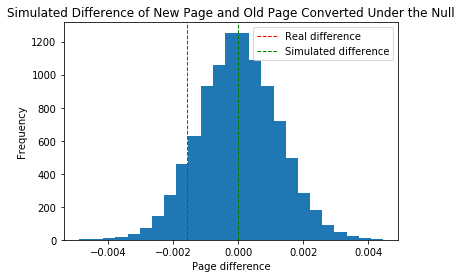

In [35]:
# Plot histogram
plt.hist(p_diffs, bins=25)
plt.title('Simulated Difference of New Page and Old Page Converted Under the Null')
plt.xlabel('Page difference')
plt.ylabel('Frequency')
plt.axvline(x=(p_new-p_old), color='r', linestyle='dashed', linewidth=1, label="Real difference")
plt.axvline(x=(np.array(p_diffs).mean()), color='g', linestyle='dashed', linewidth=1, label="Simulated difference")
plt.legend()
plt.show()

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [36]:
p_diff = p_new - p_old

In [37]:
# Find proportion of p_diffs greater than the actual difference# Find p 
greater_than_diff = [i for i in p_diffs if i > p_diff]

In [38]:

# Calculate values 
print("The actual difference:" , p_diff)

p_greater_than_diff = len(greater_than_diff)/len(p_diffs)

print('Proportion greater than actual difference:', p_greater_than_diff)

print('As a percentage: {}%'.format(p_greater_than_diff*100))

The actual difference: -0.0015782389853555567
Proportion greater than actual difference: 0.9054
As a percentage: 90.53999999999999%


Observation:- As the probability for conversion of a new page is lower than both the mean and old page conversion rates.

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

Observation:- The proportion of p_diff is greater that the actual difference we noticed and observed in the csv file. A p-value of 89.91 i.e. almost 90% is greater than our  α  level of 0.5 and that means that we failed to reject $ H_0 $..we calculate that almost 90% of the population in our simulated sample lies above the real difference which does not only suggest that the new page does not do significantly better than the old page. 

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [39]:

#Import statsmodels
import statsmodels.api as sm

# Calculate number of conversions
# Some of these values were defined ealier in this notebook: n_old and n_new

convert_old = len(df2[(df2['landing_page']=='old_page')&(df2['converted']==1)])
convert_new = len(df2[(df2['landing_page']=='new_page')&(df2['converted']==1)])

print("convert_old:", convert_old, 
      "\nconvert_new:", convert_new,
      "\nn_old:", n_old,
      "\nn_new:", n_new)

convert_old: 17489 
convert_new: 17264 
n_old: 145274 
n_new: 145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [40]:
# quick check before diving in
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [41]:

# based upon the documentation# based  
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
z_score, p_value

(1.3109241984234394, 0.9050583127590245)

In [42]:
print("z-score:", z_score,
     "\np-value:", p_value)

z-score: 1.3109241984234394 
p-value: 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

What is z-score? Ans-- Simply put, a z-score is the number of standard deviations from the mean a data point is. But more technically it’s a measure of how many standard deviations below or above the population mean a raw score is. A z-score is also known as a standard score 
Whats is p value:- p-value is the probability of observing your statistic (or one more extreme in favor of the alternative) if the null hypothesis is true.

*Observation* :A z-score represents how many standard deviations away our data point is from the mean
* A positive z-score suggests that our data point is on the right side of the mean line on the bell curve
* p-value of 0.9050 is very close to the p-value we computed earlier in part j.
* With this computation, we can confidently say we fail to reject null hypothesis

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Answer :- This is a case of Logistic Regression. In this scenario, we want to predict something that has only two possible outcomes.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [43]:
# quick consistency check
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [44]:
# copy the dataframe to a new one, for clarity
df2_copy = df2.copy()

In [45]:
# another sanity check, if True, go ahead
df2_copy.shape == df2.shape

True

In [46]:
# add an intercept
df2_copy['intercept'] = 1

# using pd.get_dummies to convert the 'landing_page' and 'group' to 1s and 0s
df2_copy[['landing_page_new', 'landing_page_old']] = pd.get_dummies(df2_copy['landing_page'])
df2_copy[['ab_page_control','ab_page_treatment']] = pd.get_dummies(df2_copy['group'])

In [47]:
# here, we will use landing_page_old and ab_page_control as our baselines, therefore remove thos  
df2_copy.drop(['landing_page_old','ab_page_control'], axis=1, inplace=True)

In [48]:
df2_copy.head()

,user_id,timestamp,group,landing_page,converted,intercept,landing_page_new,ab_page_treatment
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [49]:
logit_mod = sm.Logit(df2_copy['converted'], df2_copy[['intercept', 'ab_page_treatment']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [50]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 07 Sep 2018   Pseudo R-squ.:               8.077e-06
Time:                        01:44:59   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
intercept            -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page_treatment    -0.0150      0.011     -1.311      0.190      -0.037       0.007
=====================================================================================
"""

In [51]:
# interprete the coefficients
1/np.exp(results.params[1])

1.0151020136964766

In [52]:
# how to get p-value as if it were a one-tailed test
1-0.190/2

0.905

* For each 1 unit decrease in ab_page_treatment, conversion is 1.015 time likely holding all the other variables constant. Which is not really why we would launch a new_page!


e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

The p-value associated with ab_page is 0.190.
In Part II, the p-value was calculated where the null hypothesis was that the new page would convert more than the old page, and the alternative was the old page converted more than or equal to the new page.

As we already built the base for z-score and p-value in part-m, this p-value is different of course.
The logistic regression is two-tailed case. We are exploring only two possible outcomes and it can go either way.
Interesting part to observe is z-score, absolute of which confirms the number in part-m.
The null and alternative hypothesis associated with regression model will be as following:
$$ H_{0}: p_{old} - p_{new} = 0$$$$
H_{0}: p_{old} - p_{new} \neq 0$$

In [53]:
# duration of the experiment
duration = np.array(pd.to_datetime(df.timestamp).sort_values(ascending=True))
td = duration[-1] - duration[0]
days = td.astype('timedelta64[D]')
days / np.timedelta64(1, 'D')

21.0

Observation:- The duration of the experiment is 21 days.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

 *Answer*: It would be a good idea to consider other factors to add into the regression model. Perhaps time of day that the user used the page, might influence when people sign up online. The disadvantage is it adds complexity, because variables may affect other variables. Also, some variables may not affect the outcome. One of the foctors to consider would be the duration. The duration of this experiment was 21 days. Too short, it would be advisable to increase the duration
Geographic location is another important factor. If the page is available in multiple languages, for example, it can diversify the sample

Also, some sort of corrected R² value (in linear regression at least) which will give lower outputs if "useless" features are added.

However, only one feature was chosen to determine whether a user would convert (beside the intercept) so few of the added features wouldn't hurt. I would imagine some features like the time spent looking at page and the date the page was designed might be some interesting features to add. The longer a customer spends on a page the more they are likely to be content with it and unwilling to change, it could also be the case that really old pages will not work well and people will want an updated version.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [67]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [77]:
df_countries = pd.read_csv('countries.csv')
df_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


Observation:- The duration of the experiment is 21 days.

In [95]:
# Create the necessary dummy variables# Create
df_countries.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [79]:
country_dummies = pd.get_dummies(df_countries['country'])
df_new = df_countries.join(country_dummies)

In [80]:
df3 = df2.set_index('user_id').join(df_new.set_index('user_id'))

In [82]:
lm = sm.OLS(df3['converted'], df3[['intercept', 'UK', 'US']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.605
Date:                Tue, 04 Sep 2018   Prob (F-statistic):              0.201
Time:                        04:41:05   Log-Likelihood:                -85267.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290581   BIC:                         1.706e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1153      0.003     42.792      0.000       0.110       0.121
UK             0.0053      0.003      1.787      0.074      -0.001       0.011
US             0.0042      0.003      1.516      0.130      -0.001       0.010
==============================================================================
Omnibus:                   125552.384   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414306.036
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         9.94
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
# let's consider US being our baseline, therefore, we drop US
df_new.drop(['US'], axis=1, inplace=True)

In [98]:
df_new.head()

,user_id,country,CA,UK
0,834778,UK,0,1
1,928468,US,0,0
2,822059,UK,0,1
3,711597,UK,0,1
4,710616,UK,0,1


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

The p-value for ab_page is 0.191.

The null hypothesis was that the difference in means would be 0, and the alternative was the difference would be greater or less than 0. The p-value is still large. We fail to reject the null hypothesis.

# Conclusion::

Through this dataset we tried to understand whether the company should implement a new page or keep the old page with following:

Probability based approach
A/B test
Regression approach

Probability based approach:
Observation-

* The probability of an individual receiving the new page is 0.5001
* Meaning, there is almost the same chance that an individual received the old page

A/B test

* In A/B test we set up our hypothesis to test if new page results in better conversion or not
* We simulated our user groups with respect to conversions
* We found the p_value to be 0.8191 almost 0.90
* With such a p-value, we failed to reject null hypothesis
* By using the built-in stats.proportions_ztest we computed z-score and p-value which confirmed our earlier p-value and failure to reject null hypothesis

Regression Approach:

* We looked at exploring two possible outcomes. Whether new page is better or not.
* With logistic regression results, we again encountered same z-score as well as p-value of 0.190, corresponding two-tailed case
* By further adding and considering geographic location of the users, we tried to find if any specific country had an impact on conversion.
* The result gave a similar results and suggested that the countries have no impact on the conversion rate.

Points to consider

* the duration of the experiment was short approx 21 days which is a relatively short period of time to run the A/B test.
* Due to Change aversion effect, a group of users may give an unfair advantage to the older page
* Similarly, due to Novelty effect, users may give an unfair advantage to the newer page

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.